<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [ ]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
#from sklearn.model_selection import train_test_split

#train, test = train_test_split(df, test_size=0.2)

#np.vstack(X,y)
#print(y.shape)
y = np.reshape(y,(len(y),1))
#print(y.shape)
data=np.hstack((X,y))
print(y.dtype)

df = pd.DataFrame(data = data, columns=['f1','f2','f3','f4','f5','y'])

print(df.dtypes)
df['y'] = df['y'].apply(lambda y_ele: int(y_ele))
print(df.dtypes)
df['y'][df['y']==0]=-1
df.head(5)


int64
f1    float64
f2    float64
f3    float64
f4    float64
f5    float64
y     float64
dtype: object
f1    float64
f2    float64
f3    float64
f4    float64
f5    float64
y       int64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,f1,f2,f3,f4,f5,y
0,0.353756,0.289293,0.485230,0.622031,-1.249362,-1
1,0.204255,1.604311,-0.065753,-0.004749,1.548880,1
2,-1.297654,-0.534487,0.236149,0.270045,-1.174866,-1
3,-0.361043,-1.127174,-0.485456,-0.662865,0.546729,1
4,-1.305640,-0.838459,0.110520,0.097911,-1.043686,-1


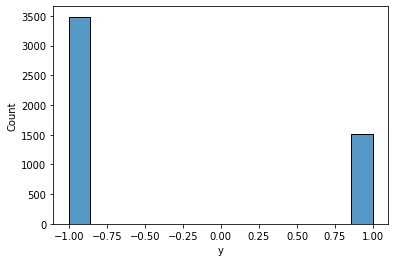

In [ ]:
import seaborn as sns

sns.histplot(data = df, x = 'y')

In [ ]:
df.groupby('y')['y'].count().reset_index(name ='count')

,y,count
0,-1,3486
1,1,1514


### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [ ]:
# you can write your code here

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
train, cv = train_test_split(train, test_size = 0.25)

assert(train.shape == (3000,6) and cv.shape == (1000,6) and test.shape == (1000,6))


In [ ]:
#Xtrain, ytrain, Xcv, ycv, Xtest, ytest
Xtrain = train.drop(['y'], axis=1).values
ytrain = train['y'].values

Xcv = cv.drop(['y'], axis=1).values
ycv = cv['y'].values

Xtest = test.drop(['y'], axis=1).values
ytest = test['y'].values


In [ ]:
Xtrain.shape

(3000, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

rbf_svm = Pipeline([
                    ("scalar", StandardScaler()), ("svm_clf", SVC(gamma=0.001,C=100))
])

rbf_svm.fit(Xtrain, ytrain)
print("train_error", np.count_nonzero(rbf_svm.predict(Xtrain) - ytrain)*100/len(ytrain), "%")

print("cv_error", np.count_nonzero(rbf_svm.predict(Xcv) - ycv)*100/len(ycv), "%")

train_error 7.3 %
cv_error 8.1 %


In [ ]:
 #rbf_svm.decision_function(Xcv)

In [ ]:
rbf_svm.predict(Xtrain)
#(∑all the support vectorsi=1(yiαiK(xi,xq))+intercept)
#how to extract alpha'is
##https://stackoverflow.com/questions/33860938/how-to-get-all-alpha-values-of-scikit-learn-svm-classifier
##alphas = np.abs(svm.dual_coef_), but why?
## svm.dual_coef_ is the product of the Lagrange multiplier alpha and the label of a data point. 
##and sklearn.model.SVC internally works with label -1 and 1


#retrieving support vectors and dual coefficients
dual_cof = rbf_svm[1].dual_coef_
dual_cof=np.reshape(dual_cof,(dual_cof.shape[1],))
sup_vectors = rbf_svm[1].support_vectors_

In [ ]:
def rbf_similarity(x1, x2, gamma= 0.001):
  dist=((x1-x2)**2).sum(axis=1)*0.001
  #print(dist)
  return np.exp(-dist)

In [ ]:
cv_class = list()
for ele in Xcv:
  similarity_mat = rbf_similarity(sup_vectors, ele)
  #print(X)
  #print(similarity_mat)
  c = (dual_cof*similarity_mat).sum() + rbf_svm[1].intercept_[0]
  cv_class.append(c)

In [ ]:
rbf_svm[1].intercept_

array([4.47845689])

In [ ]:
np.count_nonzero(np.sign(rbf_svm[1].decision_function(Xcv)) == np.sign(np.array(cv_class)))/len(np.sign(rbf_svm[1].decision_function(Xcv)) == np.sign(np.array(cv_class)))

(rbf_svm[1].decision_function(Xcv)) - (np.array(cv_class)) < 1e-7

1.0

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [ ]:
from collections import Counter

ytrain_count=Counter(ytrain)
ycv_count = Counter(ycv)
print(ytrain_count)
print(ycv_count)

Counter({-1: 2078, 1: 922})
Counter({-1: 697, 1: 303})


In [ ]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sig = 1/(1+np.exp(-z))
    return sig

In [ ]:
nplus = ycv_count[1]
nminus= ycv_count[-1]

#sum of yplus and yminus = 1 , they are kind of probabilities.
yplus = (nplus + 1)/(nplus + 2) 
yminus = 1/(nminus+2)

"""ycv_modified = ycv
ycv_modified[ycv_modified == -1] = yminus
ycv_modified[ycv_modified == 1] = yplus"""

'ycv_modified = ycv\nycv_modified[ycv_modified == -1] = yminus\nycv_modified[ycv_modified == 1] = yplus'

In [ ]:
import copy

ynew = copy.deepcopy(ycv) #making a deep copy of ycv. In this copy , we replace +1 with yplus and yminus
ynew = ynew.astype('float') #how could an array with 'int' data-types ever take in a float value

ynew[ynew==-1.0 ] = yminus
ynew[ynew==1.0 ] = yplus

fcv = np.array(cv_class)#cv_class is a list which was the answer of 8E. It is equivalent to clf.decision_function(Xcv)
#fcv will act as training_X and ynew will be training_y for the model by which we wish to predict the calibrated probabilities, which we are interested in 


In [ ]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    z = np.dot(w,x) + b
    dw = x*(y-sigmoid(z)) - alpha*w/N
    return dw

In [ ]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(dim)
    b = 0.0

    return w,b

In [ ]:
 def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     z = np.dot(w,x) + b
     db = y - sigmoid(z)
     return db

In [ ]:
#I have taken this logoss function from my earlier done assignment and modified it
#the logic is for an epoch, after updating weight and calculating predicted probabilities, we send this list as y_pred and ynew will be sent as y_true
# I have added yminus and yplus , so this algo can be used for other sets too
def logloss(y_true,y_pred, yminus, yplus):
    '''In this function, we will compute log loss '''
    #y_pred is nothing but a bounded relative measure of distance from the supposed plane(of Log Regrn(ws and b)). 
    #where measure like 0.99 means a pt far away from the plane in the direction of label(1), 0.002 means a pt far away from the plane in the direction of label(0)
    #and 0.5 means the pt is on the plane
    #log-loss penalises on 2 bases: 1. the farther away is good, so distance-measure like 0.99 an 0.002 ought to be penalised less. It is like 
    #"do you stay in north or south of equator?" The farther away you are from the equator surer you are to be not confused.[think of visiting kenya]
    #2. However, higher distance must be penalised when the device misclassified the one direction[South or North]
    #another way to look at it is that the sigmoid is probability of a point being 1 . we know that log-loss fn respects the respective probabs according to their labels
    #if a pt has probab of 0.03 for being classified as 1 , it is the same saying it is 0.97 probable to be classiffied as 0.
    #i.e, log-loss only once look at the label-value to understand which language too respect

    #we use this logic to make the code simpler as following

    loss_list = []
    for y, pred in zip(y_true, y_pred):
      each_loss = -(y*np.log10(pred) + (1-y)*np.log10(1-pred))
      loss_list.append(each_loss)
      
    loss = np.array(loss_list).mean()
    return loss

In [ ]:
def train(X_train,y_train,epochs,alpha,eta0,yminus, yplus, tol =1e-4):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)                => doubt : isn't it too methodical to be called stochastical? where is randomness? 
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train[for all data points in X_train] using w,b
        #compute the loss between predicted and actual values (call the loss function)=>doubt: 
        # store all the train loss values in a list
        # predict the output of x_test[for all data points in X_test] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b
    
    
    train_loss_lst = []
    
    N = len(X_train)
    dim = X_train[0]
    w,b = initialize_weights(dim)
    cond = True
    #for iter in range(epochs):#if we assume that one epoch corresponds to one distinct training,(which makes sense, as we have seen all the training points,one by one) then only it is advisible to maintain a list of test losses
    num_epoch = 0
    while cond:
      #print(num_epoch)
      for  ind in range(N):
      #ind = np.random.randint(low = 0,high = len(X_train),size=1)[0]
        x = X_train[ind]
        #print(x.shape)
        y = y_train[ind]
        #print(y.shape)
        
        dw = gradient_dw(x,y,w,b,alpha,N) #note : logloss + reg are being used for every point , indirectly, by calculating dL/dw and dL/db,
        db = gradient_db(x,y,w,b)         #i.e we are taking care of finding the slope and use that to obtain new position and it is actually slope and not the exact value of the terrain_height which gives optimum value of the position we should take, no matter that optimity in first place is defined by the minimity of terrain_height only
        w = w + eta0*dw
        b = b + eta0*db
        
      preds = [ sigmoid(np.dot(w,x_row) + b) for x_row in X_train ]


      #print(preds)
      #print(len(preds[0])) 
      loss = logloss(y_train, preds,yminus,yplus)
      train_loss_lst.append(loss)
        
      
      num_epoch+=1
      #cond = not( (len(test_loss_lst)>3 and (test_loss_lst[-2] - test_loss_lst[-1]) >0 and (test_loss_lst[-2] - test_loss_lst[-1]) < tol) or  num_epoch == epochs-1 )
      cond = not( (len(train_loss_lst)>3 and (train_loss_lst[-2] - train_loss_lst[-1]) >0 and (train_loss_lst[-2] - train_loss_lst[-1]) < tol) or  num_epoch == epochs-1 )
      #print(cond)

    return w,b,train_loss_lst,preds

In [ ]:
alpha=0.0001
eta0=0.0001

epochs= 30
w,b,train_loss_lst,preds=train(fcv,ynew,epochs,alpha,eta0,yminus,yplus)

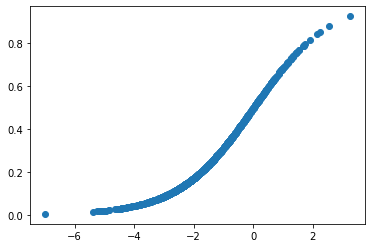

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(fcv,preds)
plt.show()

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
